In [16]:
import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [17]:
date_0 = '2000-08-01'
date_1 = '2022-09-01'
date_2 = '2022-10-01'
stock = '0050.TW'

data = yf.Ticker(stock).history(start=date_0, end=date_1)
price = data['Close']
x = np.array(price)

data2 = yf.Ticker("0050.TW").history(start=date_0, end=date_2)
price2 = data2['Close']
x2 = np.array(price2)
price

Date
2008-01-02     60.009998
2008-01-03     58.889999
2008-01-04     59.009998
2008-01-07     56.389999
2008-01-08     56.980000
                 ...    
2022-08-25    119.000000
2022-08-26    119.599998
2022-08-29    116.550003
2022-08-30    116.750000
2022-08-31    117.599998
Name: Close, Length: 3608, dtype: float64

In [18]:
stock = '^GSPC'
data = yf.Ticker(stock).history(period='1y').reset_index()
price = data['Close']
x = np.array(price)

In [19]:
# n_predict = price2.size - price.size
# print('n_predict = ', n_predict)
n = x.size
print('n = ', n)
n_harm = 10                     # number of harmonics in model
t = np.arange(0, n)
p = np.polyfit(t, x, 1)         # find linear trend in x
x_notrend = x - p[0] * t        # detrended x

n =  252


c:\Users\e4903\Desktop\code\venv_stock\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


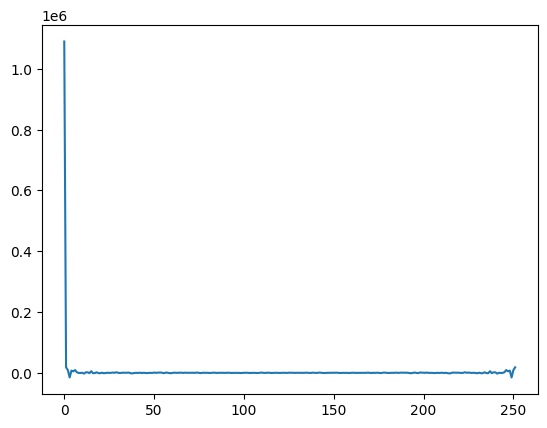

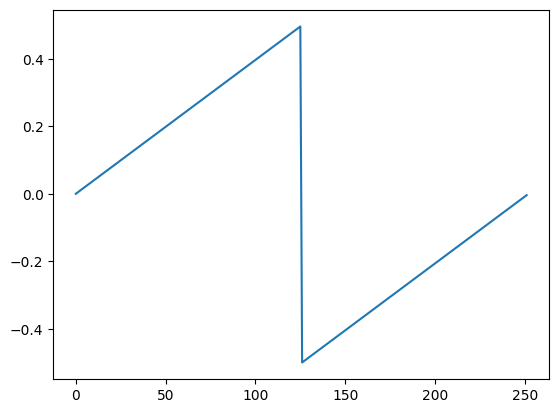

In [20]:
x_freqdom = fft.fft(x_notrend,n)  # detrended x in frequency domain
pl.plot(x_freqdom)
pl.show()
f = fft.fftfreq(n)
pl.plot(f)
pl.show()

In [21]:
indexes = list(range(n))             # frequencies

# indexes.sort(key = lambda i: np.absolute(f[i]))  # sort indexes by frequency, lower -> higher
indexes.sort(key=lambda i: np.absolute(x_freqdom[i]))  # sort indexes by amplitudes, lower -> higher 
indexes.reverse() # sort indexes by amplitudes, higher -> lower 
t = np.arange(0, n)
restored_sig = np.zeros(t.size)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125], dtype=int32),)


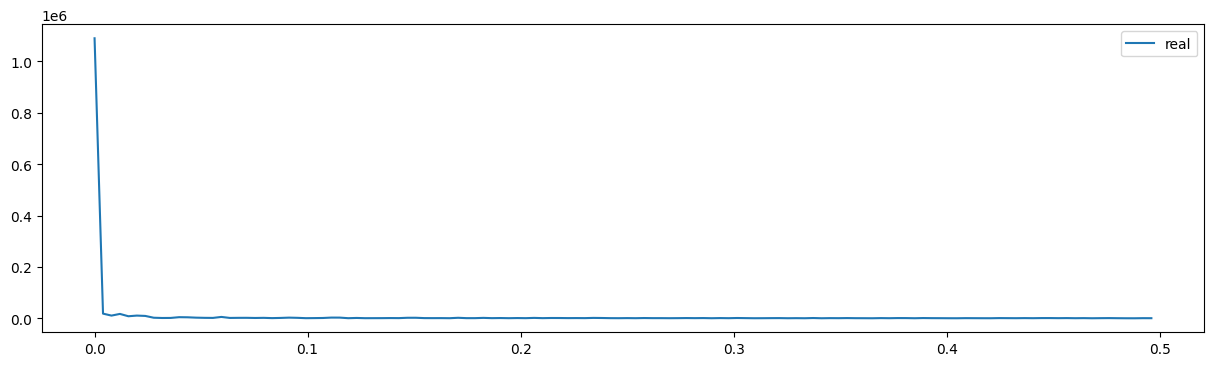

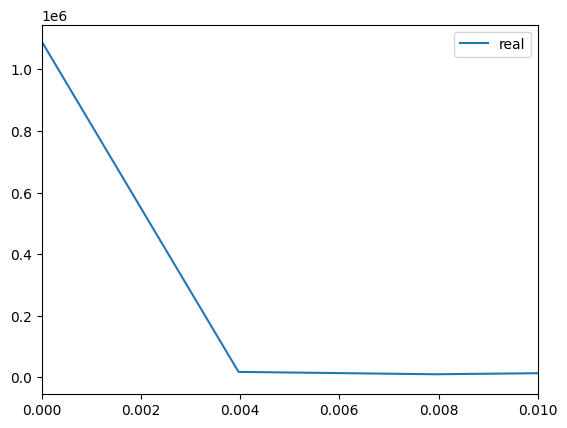

C:\Users\e4903\AppData\Local\Temp\ipykernel_11076\1778413221.py:15: RuntimeWarning: divide by zero encountered in divide
  pl.plot(1/f[mask], abs(x_freqdom[mask]), label="real")


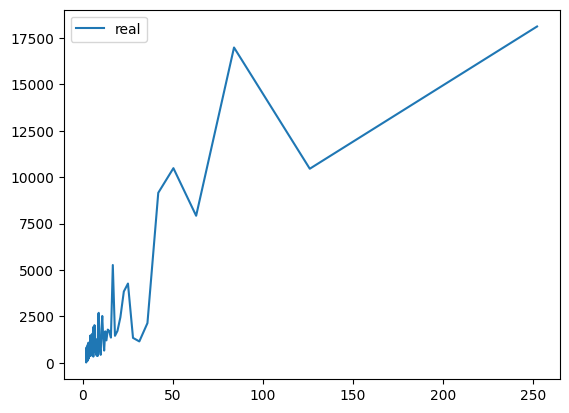

In [22]:
mask = np.where(f >= 0)
print(mask)
pl.plt.figure(figsize=(15,4))
# pl.xlim(0,0.01)
pl.plot(f[mask], abs(x_freqdom[mask]), label="real")
pl.legend()
pl.show()

pl.plot(f[mask], abs(x_freqdom[mask]), label="real")
pl.xlim(0,0.01)
pl.legend()
pl.show()


pl.plot(1/f[mask], abs(x_freqdom[mask]), label="real")
# pl.xlim(0,0.01)
pl.legend()
pl.show()


i =  0
fequence :  0.0
Period :  inf (Days)


C:\Users\e4903\AppData\Local\Temp\ipykernel_11076\3660024861.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  print('Period : ' ,1/abs(f[i]) ,'(Days)')


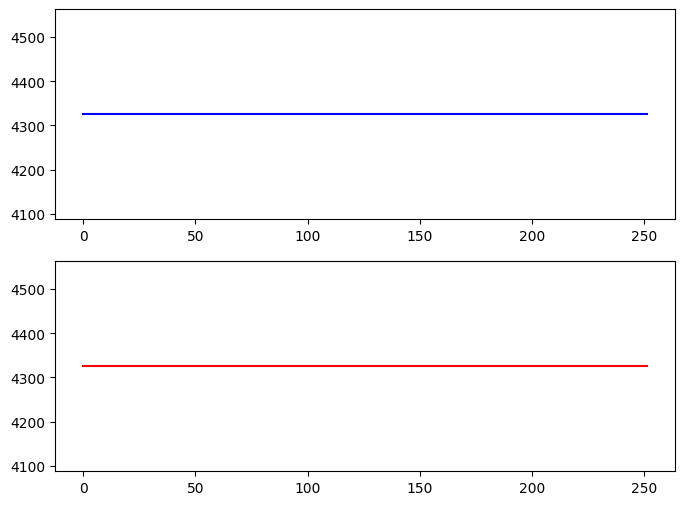

i =  1
fequence :  0.003968253968253968
Period :  252.0 (Days)


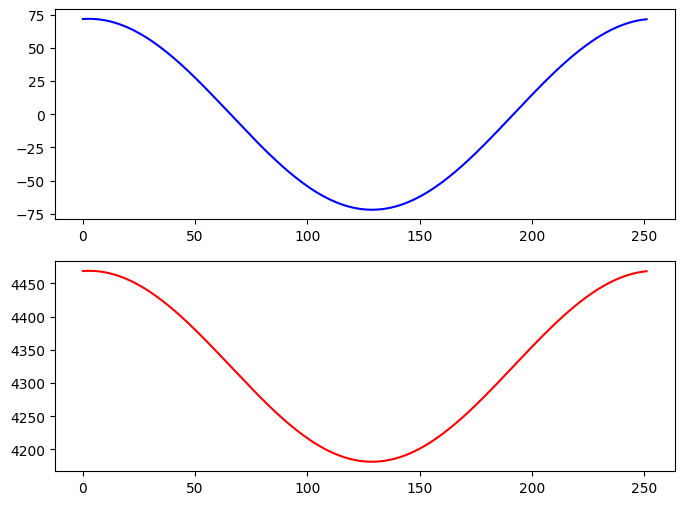

i =  3
fequence :  0.011904761904761904
Period :  84.0 (Days)


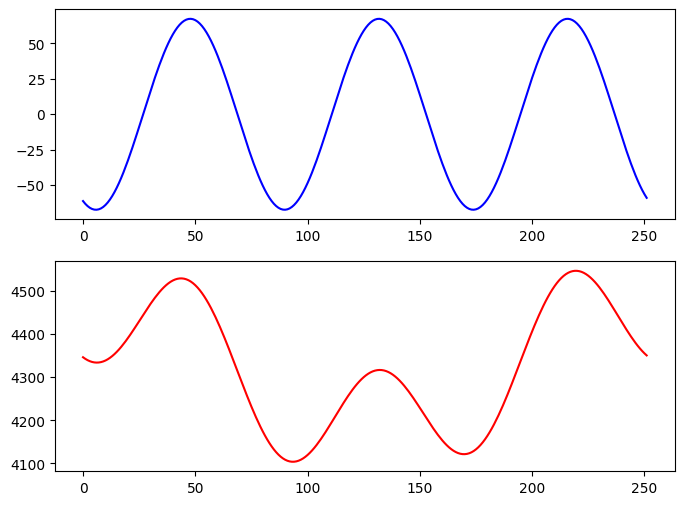

i =  5
fequence :  0.01984126984126984
Period :  50.400000000000006 (Days)


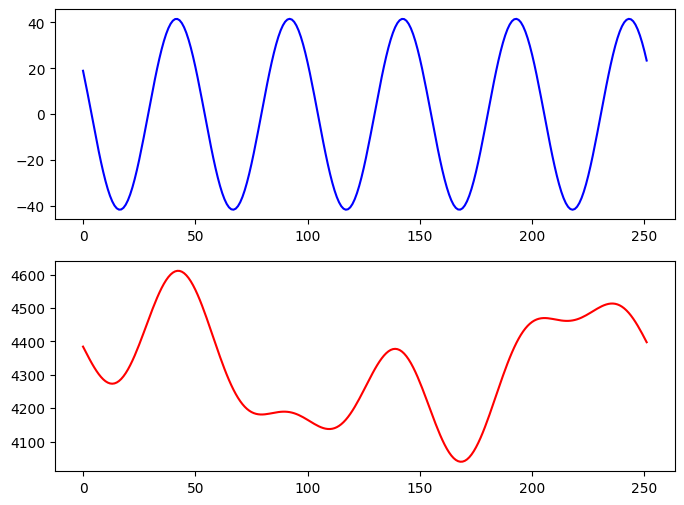

i =  2
fequence :  0.007936507936507936
Period :  126.0 (Days)


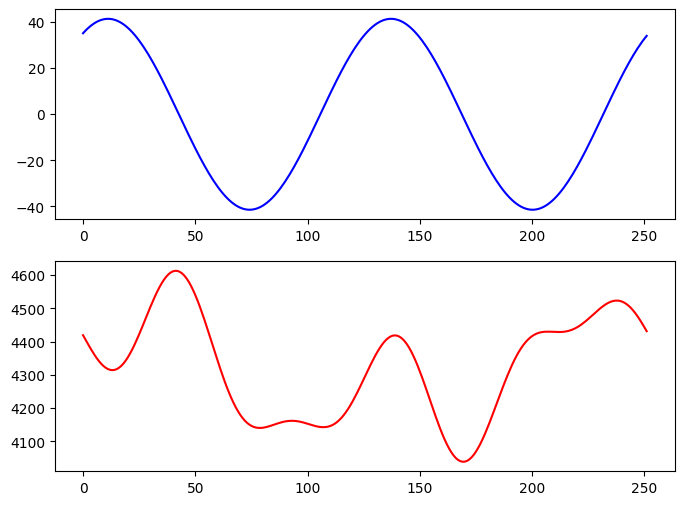

i =  6
fequence :  0.023809523809523808
Period :  42.0 (Days)


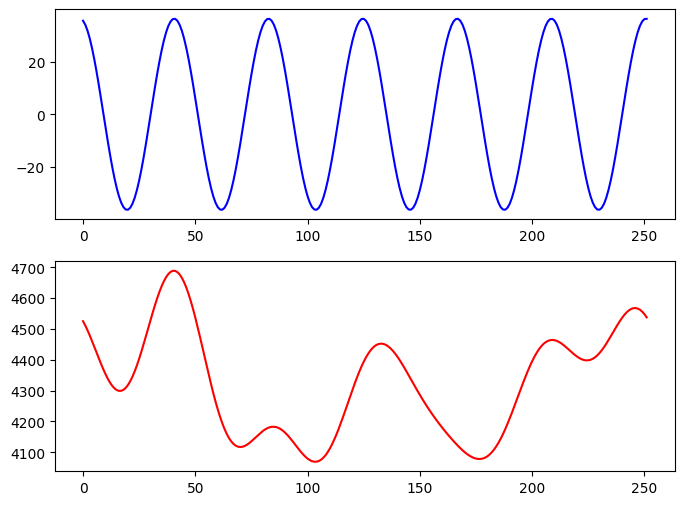

i =  4
fequence :  0.015873015873015872
Period :  63.0 (Days)


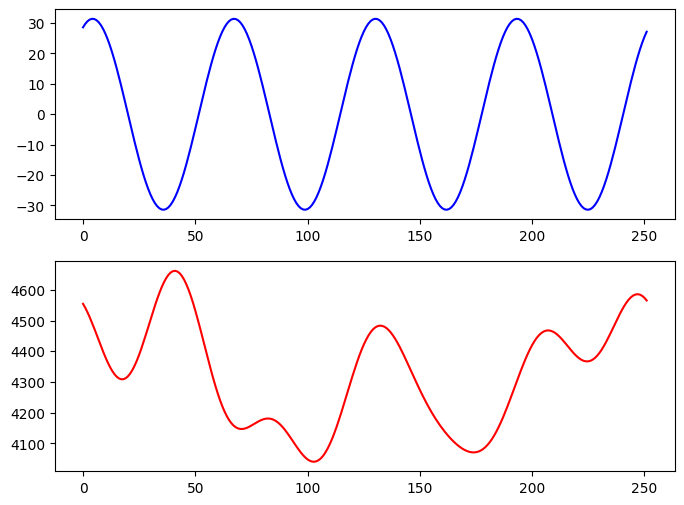

In [23]:
for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        signal = ampli * np.cos(2 * np.pi * f[i] * t + phase)
        restored_sig += signal

        if( i < 10) :
            print('i = ',i)
            print('fequence : ' ,abs(f[i]))
            print('Period : ' ,1/abs(f[i]) ,'(Days)')
            fig, axes = plt.subplots(2, 1, figsize=(8, 6))
            axes[0].plot(signal, 'b',label = 'sig')
            axes[1].plot(restored_sig, 'r',label = 'restored_sig')
            plt.show()
signal = restored_sig + p[0] * t

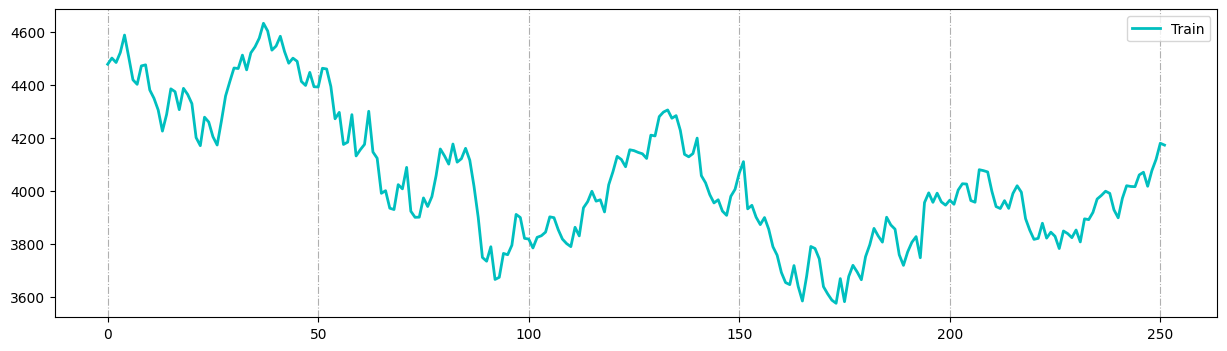

In [24]:
pl.plt.figure(figsize=(15,4))
# pl.plot(price2.index, x2, 'b', linewidth = 3,label = 'Data')
pl.plot(price.index, x, 'c', linewidth = 2, label = 'Train')
# pl.plot(price2.index, signal, 'r',label = 'Predict')
pl.plt.grid(axis='x',linestyle='-.')
pl.legend()
pl.show()